In [1]:
import grifflin
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io.wavfile import write
import pre_pross as prpr

In [2]:
base=prpr.open_bdd('./VT_IGEPN_1.json')
print(base.to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



No handles with labels found to put in legend.


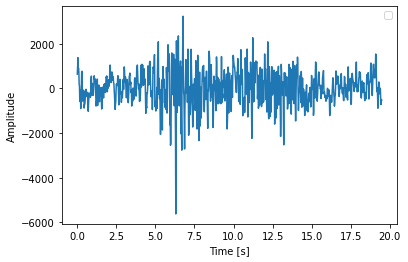

In [6]:
numero=100
muestra=base['Data'][numero]
samplerate=base['SampleRate'][numero]
inicio=int(base['StartPoint'][numero])
fin=int(base['EndPoint'][numero])
señal_ori= muestra[inicio:fin]
tamaño = len(señal_ori) / samplerate
time = np.linspace(0., tamaño, len(señal_ori))
plt.plot(time, señal_ori)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

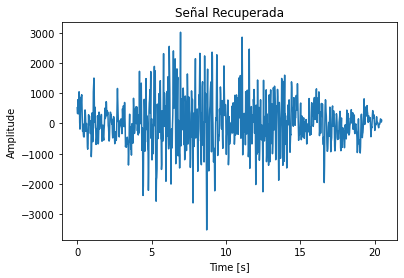

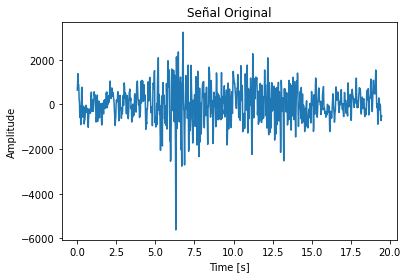

In [7]:
muestra_rec_arr=np.array(señal_ori)
f, t, Zxx = signal.stft(muestra_rec_arr, fs=samplerate, padded=True)
espectro_magnitud_ori = np.abs(Zxx)
espectro_fase_ori = np.angle(Zxx)
timee, señal_rec=grifflin.reconstruir_señal_generador(
    espectro_magnitud_ori, 100000, samplerate)
plt.plot(timee,señal_rec)
plt.title("Señal Recuperada")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
plt.plot(time, señal_ori)
plt.title("Señal Original")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
# er=np.zeros(muestra_rec_arr.shape[0])
# for i in range(muestra_rec_arr.shape[0]):
#     ea=abs(muestra_rec_arr[i]-señal_rec[i])
#     er[i]=abs(ea/muestra_rec_arr[i])
# error=er.mean()
# print(error)

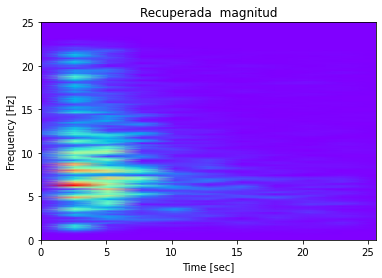

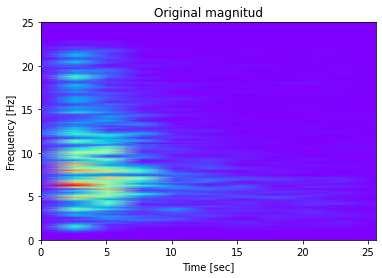

In [31]:
fr, tr, Zxxr = signal.stft(señal_rec, fs=samplerate, padded=True)
espectro_magnitud_rec = np.abs(Zxxr)
espectro_fase_rec = np.angle(Zxxr)
plt.pcolormesh(tr, fr, espectro_magnitud_rec, shading='gouraud', cmap="rainbow")
plt.title('Recuperada  magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.pcolormesh(t, f, espectro_magnitud_ori, shading='gouraud', cmap="rainbow")
plt.title('Original magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

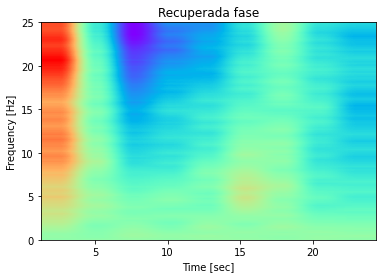

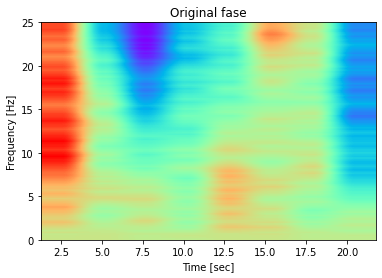

In [9]:
plt.specgram(señal_rec, Fs=samplerate, cmap="rainbow", mode='phase')
plt.title('Recuperada fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.specgram(señal_ori, Fs=samplerate, cmap="rainbow", mode='phase')
plt.title('Original fase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

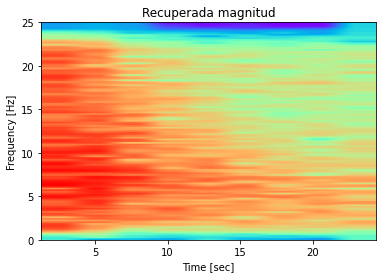

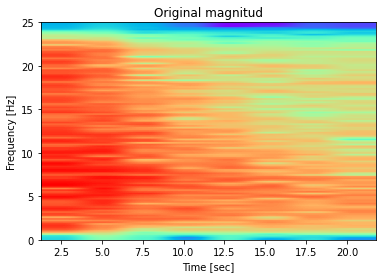

In [29]:
plt.specgram(señal_rec, Fs=samplerate, cmap="rainbow", mode='magnitude')
plt.title('Recuperada magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
plt.specgram(señal_ori, Fs=samplerate, cmap="rainbow", mode='magnitude')
plt.title('Original magnitud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
